In [2]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage.io import imread
from skimage.color import rgb2lab, lab2rgb

# Preamble 
code for Arduino

`
void loop() {
  setColor(0, 0, 0);
  setColor(50, 50, 0);
}
`

# STEP 1
Split the video into frames and then take a single frame to extract the CIELab values of White Light and Blue Light

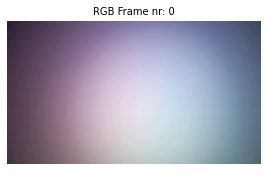

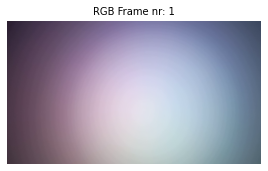

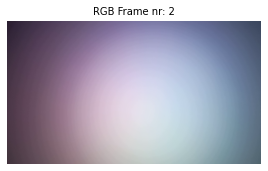

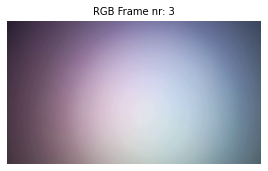

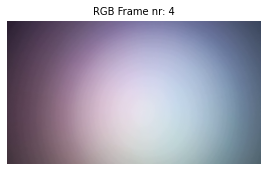

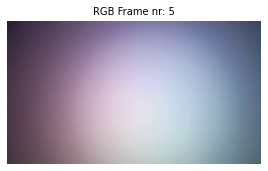

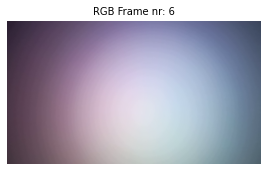

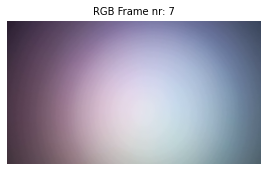

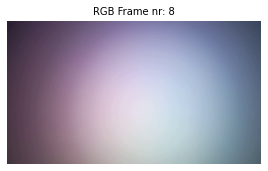

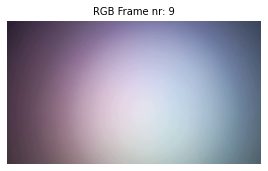

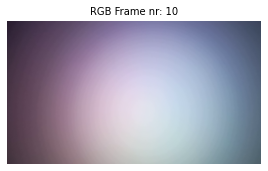

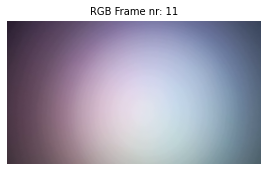

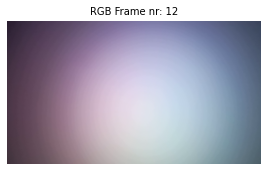

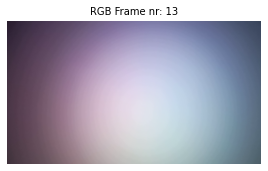

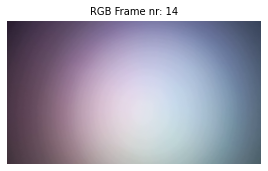

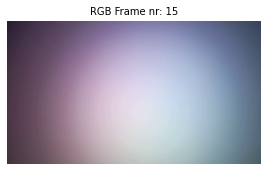

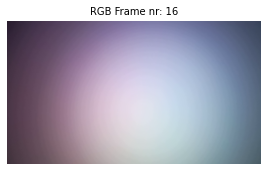

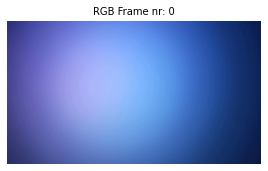

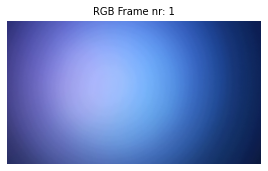

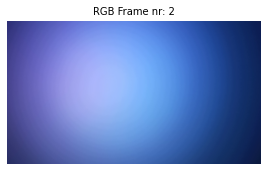

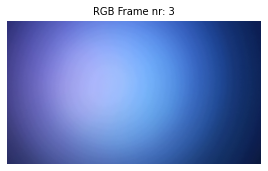

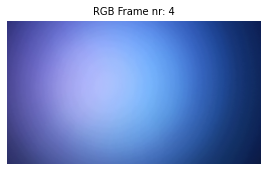

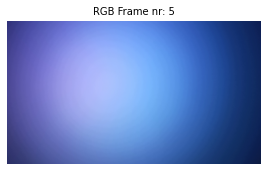

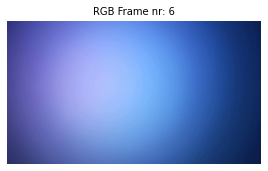

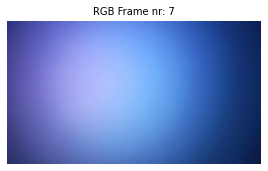

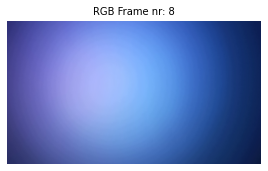

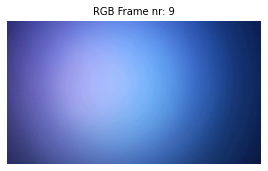

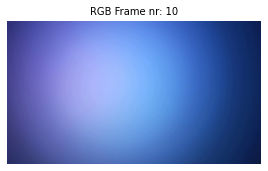

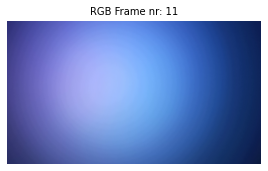

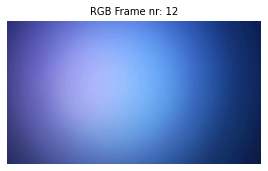

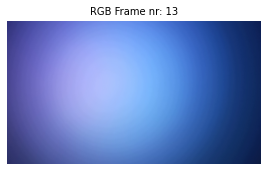

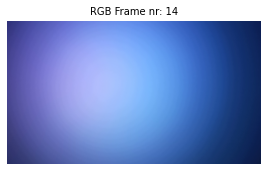

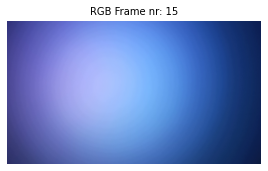

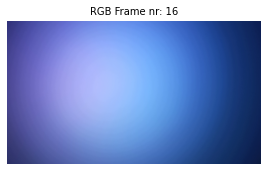

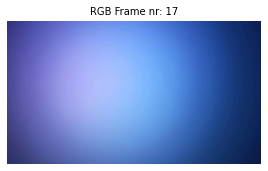

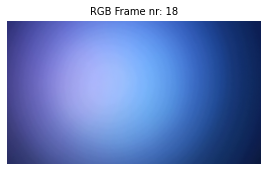

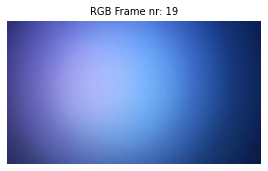

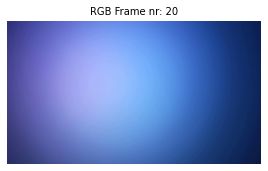

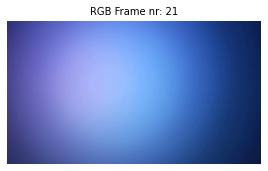

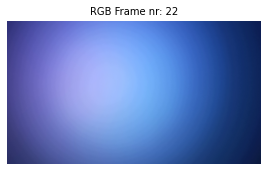

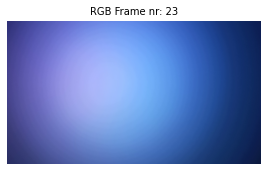

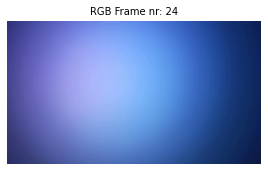

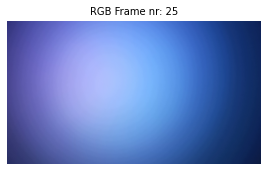

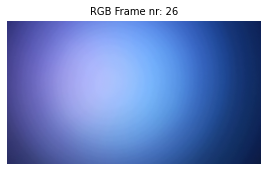

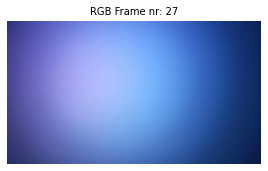

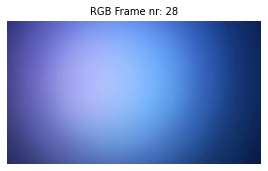

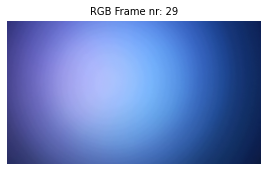

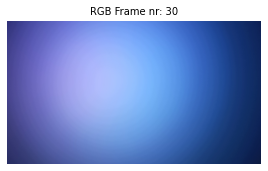

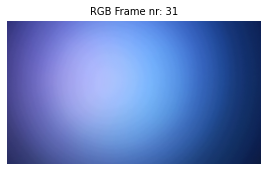

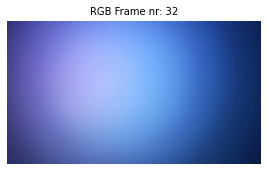

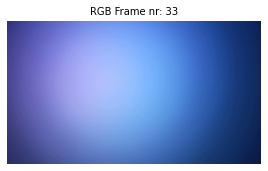

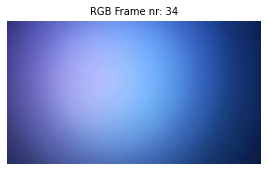

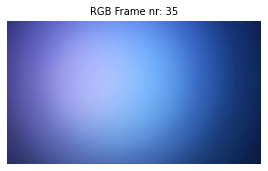

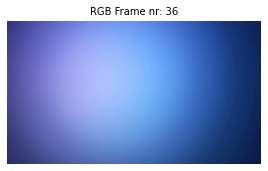

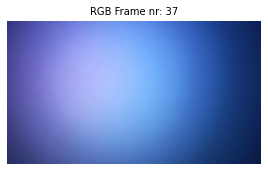

In [11]:
# Function that takes the location of the video and splits the video into frames in CIELAB Color Space
def splitFrames(videoLoc):
    cap= cv2.VideoCapture(videoLoc)
    totalframecount= int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    frames = [] # np.array(totalframecount)
    i = 0
    while(cap.isOpened()):
        ret, frameBGR = cap.read()
        if ret == False:
            break
        #frameLab = rgb2lab(frameRGB)
        frameLab = cv2.cvtColor(frameBGR, cv2.COLOR_BGR2LAB)
        frameRGB = cv2.cvtColor(frameBGR, cv2.COLOR_BGR2RGB)
        frames.insert(i,cv2.rotate(frameLab, cv2.ROTATE_90_CLOCKWISE))
        plt.figure(figsize=(10,5))
        plt.subplot(121), plt.imshow(cv2.rotate(frameRGB, cv2.ROTATE_90_CLOCKWISE)), plt.axis('off'), plt.title('RGB Frame nr: ' + str(i), size=10)
        plt.show()
        i+=1
    
    cap.release()
    cv2.destroyAllWindows()
    return frames

# List of all the frames in CIELAB Color Space
framesWhite = splitFrames('./000diff.mp4')
framesBlue = splitFrames('./50500diff.mp4')

# STEP 2
Get the center pixel values of the two images

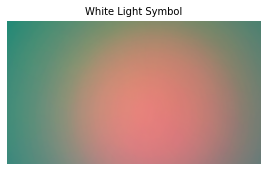

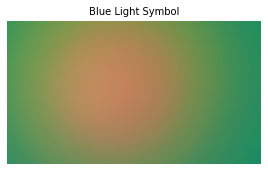

White light CIELab Value:
[224 135 119]
Blue light CIELab Value:
[189 129  89]


In [12]:
#print(frames[0])
imageWhite = framesWhite[3]
imageBlue = framesBlue[3]

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(imageWhite), plt.axis('off'), plt.title('White Light Symbol', size=10)
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(imageBlue), plt.axis('off'), plt.title('Blue Light Symbol', size=10)
plt.show()

XW = int(len(imageWhite)/2)
YW = int(len(imageWhite[0])/2)

CIELabWhite = imageWhite[XW][YW]
CIELabBlue = imageBlue[XW][YW]

print("White light CIELab Value:")
print(CIELabWhite)

print("Blue light CIELab Value:")
print(CIELabBlue)